In [38]:
import pandas as pd
from scipy.signal import savgol_filter
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

/var/folders/cb/s9sjq6dx01990v5hdvfhl7x40000gn/T/ipykernel_74249/178503141.py:7: RankWarning: Polyfit may be poorly conditioned
  coeff = np.polyfit(df['savgol'].index, df['savgol'], 30)


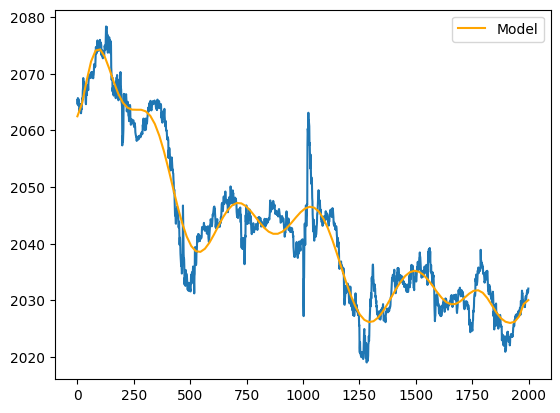

In [53]:
df = pd.read_csv("XAUUSD_M5_202401020100_202411290155.csv", sep='\t')
df = df.iloc[:, :6]
df.columns = ['da', 'time', 'op', 'hi', 'lo', 'cl']
df['savgol'] = savgol_filter(df.cl, 288, 3)
df = df.iloc[:2000, :]

coeff = np.polyfit(df['savgol'].index, df['savgol'], 30)
model = np.poly1d(coeff)
derivative = model.deriv()
derivative
critical_points = np.roots(derivative)
critical_points
plt.plot(df.cl)
t = np.linspace(min(df['savgol'].index), max(df['savgol'].index), 100)
plt.plot(t, model(t), label="Model", color="orange")
plt.legend()
plt.show()

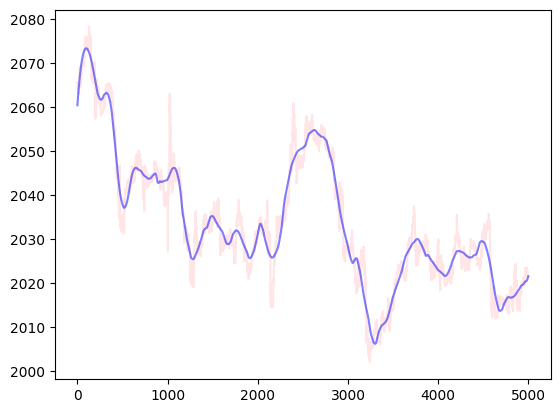

In [37]:
df = pd.read_csv("XAUUSD_M5_202401020100_202411290155.csv", sep='\t')
df = df.iloc[:, :6]
df.columns = ['da', 'time', 'op', 'hi', 'lo', 'cl']
df['savgol'] = savgol_filter(df.cl, 288, 3)
df = df.iloc[:5000, :]
plt.plot(df.cl, color='r', alpha=0.1)
plt.plot(df.savgol, color='b', alpha=0.5)

In [77]:
# parmas ==========
count = 300

highest = 0
high_iter = 0
highest_index = 0
high_list = []

lowest = 10000
low_iter = 0
lowest_index = 0
low_list = []

for index, i in enumerate(df.savgol):
    if i > highest: 
        highest = i
        high_iter = 0
        highest_index = index
    else:
        high_iter += 1
    if i < lowest:
        lowest = i
        low_iter = 0
        lowest_index = index
    else:
        low_iter += 1
    if low_iter == count:
        low_iter = 0
        low_list.append(lowest_index)
    if high_iter == count:
        high_iter = 0
        high_list.append(highest_index)
    # print(index, highest, high_iter, lowest, low_iter)
    

In [79]:
count = 300

high_list = []
low_list = []

for index in range(1, len(df.savgol) - 1):
    # Check for local maximum
    if df.savgol[index] > df.savgol[index - 1] and df.savgol[index] > df.savgol[index + 1]:
        high_list.append(index)

    # Check for local minimum
    if df.savgol[index] < df.savgol[index - 1] and df.savgol[index] < df.savgol[index + 1]:
        low_list.append(index)


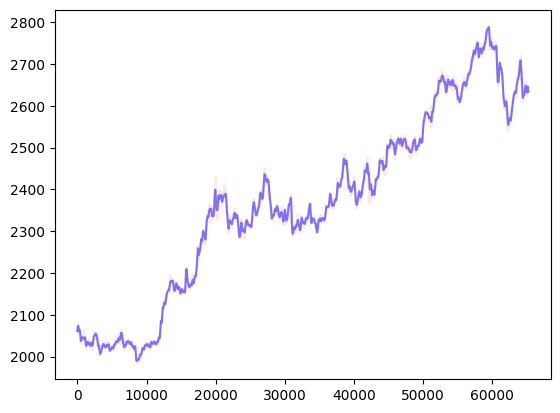

In [116]:
df = pd.read_csv("XAUUSD_M5_202401020100_202411290155.csv", sep='\t')
df = df.iloc[:, :6]
df.columns = ['da', 'time', 'op', 'hi', 'lo', 'cl']
df['savgol'] = savgol_filter(df.cl, 288, 3)
df = df.iloc[:, :]
plt.plot(df.cl, color='r', alpha=0.1)
plt.plot(df.savgol, color='b', alpha=0.5)

In [117]:
count = 300

low_value = float('inf')
low_index = -count
low_counter = 0
low_list = []

high_value = float('-inf')
high_index = -count
high_counter = 0
high_list = []

index = 0

# Trigger to track the type of the last added extremum
prev_high = False
prev_low = False

while index < len(df.savgol):

    value = df.savgol[index]

    # Check for low
    if value < low_value:
        low_value = value
        low_index = index
        low_counter = 0
    else:
        low_counter += 1

    if low_counter == count:
        # Only add the low if the last added extremum was not a low
        if not prev_low:
            low_list.append(low_index)
            prev_low = True
            prev_high = False  # Reset prev_high
        # Reset low tracking
        low_value = float('inf')
        low_counter = 0

    # Check for high
    if value > high_value:
        high_value = value
        high_index = index
        high_counter = 0
    else:
        high_counter += 1

    if high_counter == count:
        # Only add the high if the last added extremum was not a high
        if not prev_high:
            high_list.append(high_index)
            prev_high = True
            prev_low = False  # Reset prev_low
        # Reset high tracking
        high_value = float('-inf')
        high_counter = 0

    # Increment the index
    index += 1

# Print the results
print("Low indices:", low_list)
print("High indices:", high_list)
a = high_list + low_list
values = []
for i in sorted(a):
    values.append(df.cl[i])


Low indices: [0, 521, 1281, 1911, 3300, 4077, 4683, 6773, 8543, 10530, 10946, 11349, 14034, 14913, 15545, 16159, 17563, 18514, 19511, 20232, 20959, 21865, 22362, 23473, 24167, 25125, 25841, 26695, 28121, 29255, 29762, 30223, 31161, 32215, 32880, 33852, 34688, 35240, 37033, 37783, 39602, 40405, 40977, 42644, 44293, 44971, 45941, 46962, 48268, 48991, 49750, 51174, 53341, 54066, 55308, 56138, 58056, 58444, 60309, 60881, 62306, 64433]
High indices: [98, 700, 1495, 2629, 3768, 4480, 6363, 7400, 10242, 10700, 11115, 13710, 14298, 15106, 15759, 17428, 18195, 19333, 19938, 20782, 21434, 22036, 22745, 23717, 24505, 25521, 26490, 27077, 28897, 29555, 30018, 30857, 31878, 32440, 33642, 34065, 35111, 36569, 37670, 38589, 40021, 40784, 41915, 43757, 44867, 45314, 46422, 47274, 48765, 49563, 50447, 52776, 53620, 54249, 55993, 57860, 58261, 59501, 60496, 61092, 64077, 64845]


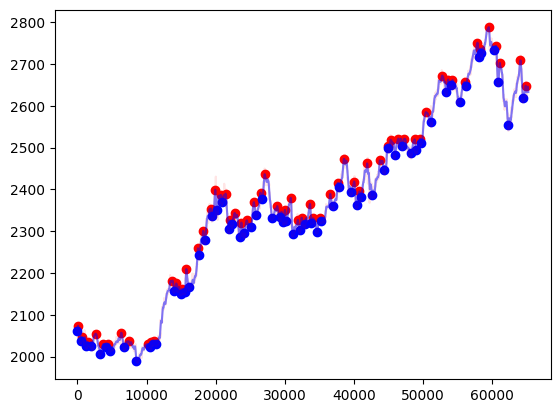

In [118]:
plt.plot(df.cl, color='r', alpha=0.1)
plt.plot(df.savgol, color='b', alpha=0.5)
for i in high_list:
    plt.scatter(i, df.savgol[i], color='r')
for i in low_list:
    plt.scatter(i, df.savgol[i], color='b')

[np.float64(3.08),
 np.float64(3.69),
 np.float64(4.56),
 np.float64(4.8),
 np.float64(5.22),
 np.float64(5.24),
 np.float64(5.6),
 np.float64(7.07),
 np.float64(7.66),
 np.float64(8.09),
 np.float64(8.74),
 np.float64(8.94),
 np.float64(9.05),
 np.float64(10.03),
 np.float64(10.06),
 np.float64(10.27),
 np.float64(10.85),
 np.float64(11.04),
 np.float64(11.81),
 np.float64(12.31)]

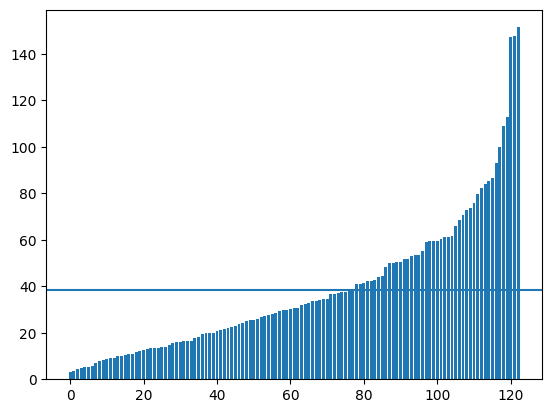

In [122]:
diffs = []
for i in range(1, len(values)):
    diffs.append(abs(np.round(values[i] - values[i-1], 2)))
diffs = sorted(diffs)
plt.bar([i for i in range(len(diffs))], diffs)
plt.axhline(np.mean(diffs))
diffs[:20]

(array([35., 30., 21., 19.,  6.,  5.,  2.,  2.,  0.,  3.]),
 array([  3.08 ,  17.908,  32.736,  47.564,  62.392,  77.22 ,  92.048,
        106.876, 121.704, 136.532, 151.36 ]),
 <BarContainer object of 10 artists>)

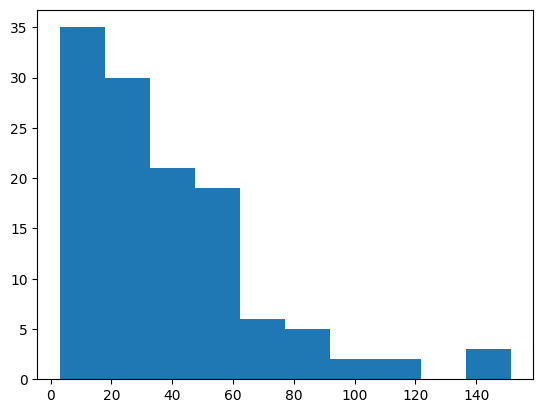

In [120]:
plt.hist(diffs)
